Total frame entries: 19680
Number of unique frames: 256
Frame range: 0 to 1020
Number of cycle resets detected: 76
Average frames per cycle: 255.82
Detected cycle reset after frames: [1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020
 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020
 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020
 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020
 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020
 1020 1020 1020 1020 1020 1020]
Reset to frames: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


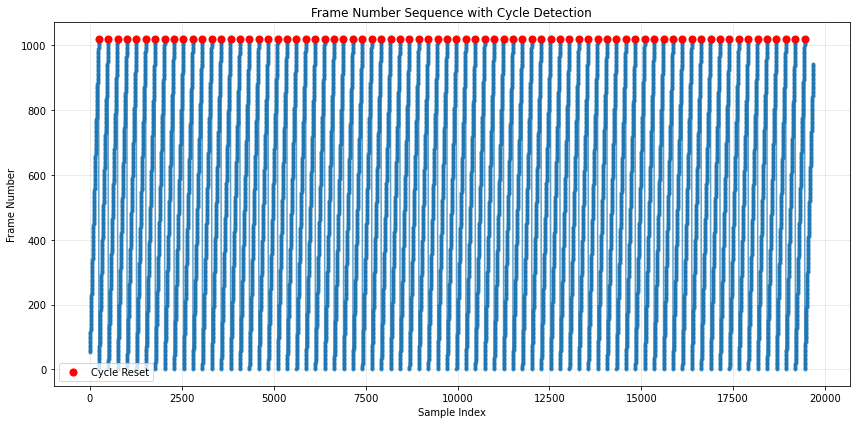

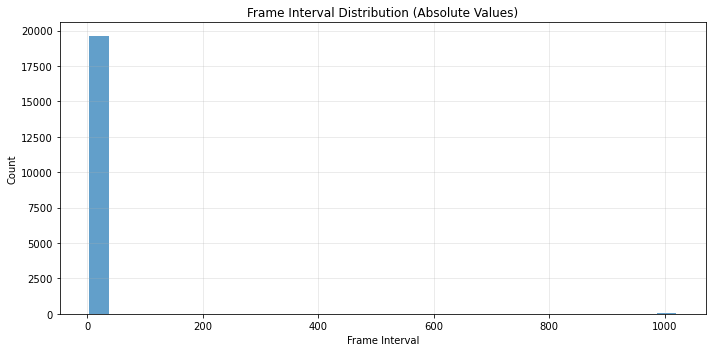

In [5]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt

# File path
file_path = os.path.join(os.getcwd(), '..', 'data', 'channel_estimates_x400_mission_6gnext2.txt')

# Check file existence
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}")

# Collect unique frame numbers
frame_numbers = []
frame_pattern = re.compile(r'SRS Frame (\d+)')

# Read file and extract frame numbers
with open(file_path, 'r') as file:
    for line in file:
        match = frame_pattern.search(line)
        if match:
            frame_numbers.append(int(match.group(1)))

# Convert to numpy array for analysis
frame_numbers = np.array(frame_numbers)
frame_diffs = np.diff(frame_numbers)

# Find where the cycle resets (large negative differences)
cycle_resets = np.where(frame_diffs < -100)[0]
cycle_lengths = np.diff(np.append([0], cycle_resets))

# Print statistics
print(f"Total frame entries: {len(frame_numbers)}")
print(f"Number of unique frames: {len(np.unique(frame_numbers))}")
print(f"Frame range: {min(frame_numbers)} to {max(frame_numbers)}")
print(f"Number of cycle resets detected: {len(cycle_resets)}")
if len(cycle_resets) > 0:
    print(f"Average frames per cycle: {np.mean(cycle_lengths):.2f}")
    print(f"Detected cycle reset after frames: {frame_numbers[cycle_resets]}")
    print(f"Reset to frames: {frame_numbers[cycle_resets+1]}")

# Plot frame sequence with cycle markers
plt.figure(figsize=(12, 6))
plt.plot(range(len(frame_numbers)), frame_numbers, marker='.', linestyle='-', alpha=0.7)
plt.scatter(cycle_resets, frame_numbers[cycle_resets], color='red', s=50, zorder=5, label='Cycle Reset')
plt.title('Frame Number Sequence with Cycle Detection')
plt.xlabel('Sample Index')
plt.ylabel('Frame Number')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Plot absolute frame differences to better visualize the pattern
plt.figure(figsize=(10, 5))
plt.hist(np.abs(frame_diffs), bins=30, alpha=0.7)
plt.title('Frame Interval Distribution (Absolute Values)')
plt.xlabel('Frame Interval')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Analyzing frame sequence pattern...
Total frame entries: 19680
Number of unique frames: 256
Frame range: 0 to 1020
Number of cycle resets detected: 76
Most common frame interval: 4
Average frames per cycle: 255.82
Detected cycle reset after frames: [1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020
 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020
 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020
 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020
 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020
 1020 1020 1020 1020 1020 1020]
Reset to frames: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]

Processing full dataset for visualization...
Cycle transition detected: 1020 → 0 (Cycle 1)
Cycle transition detected: 1020 → 0 (Cycle 2)
Cycle transition detected: 1020 → 0 (Cycle 3)
Cycle t

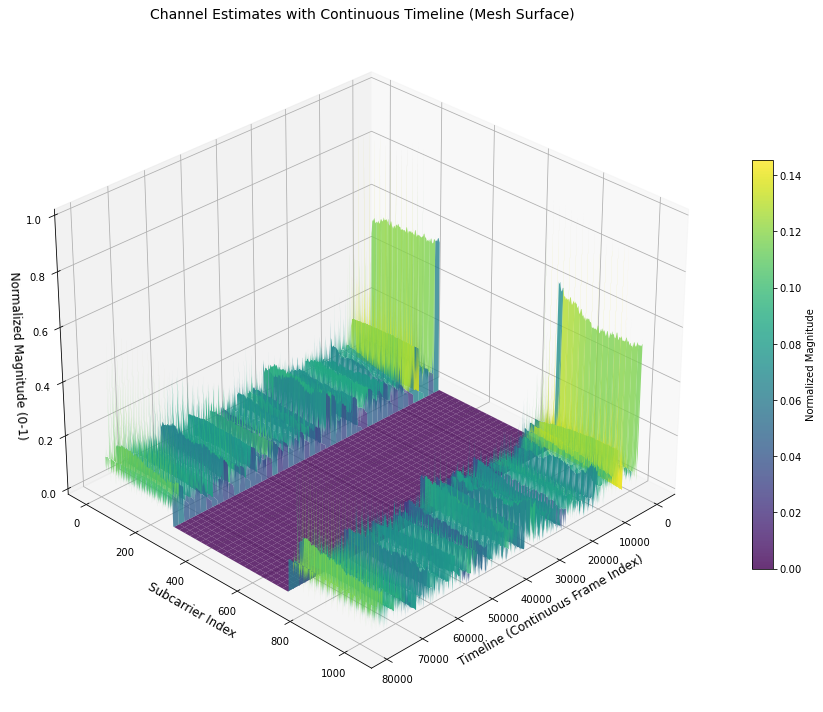

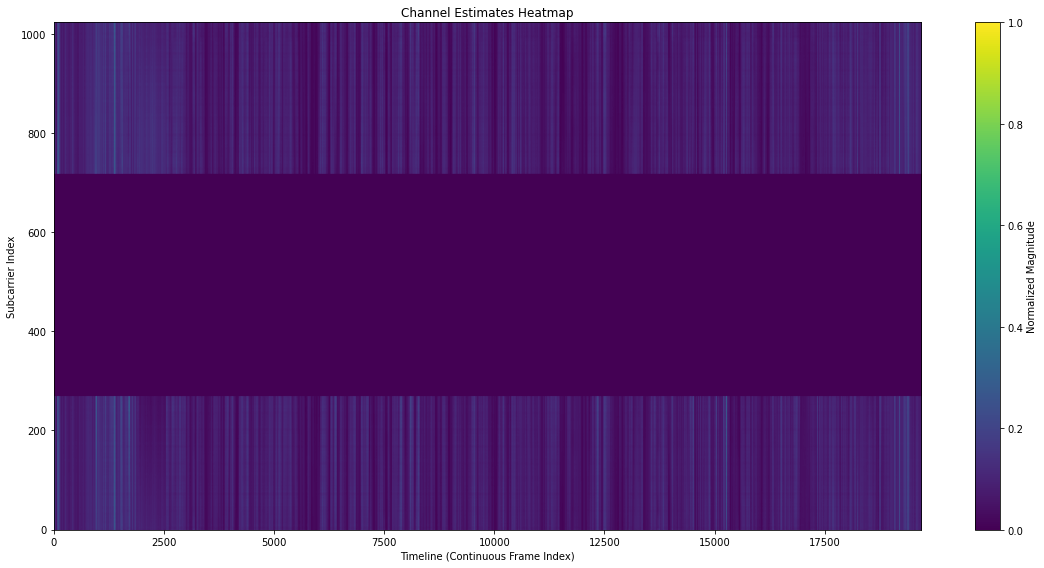

In [ ]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# File path
file_path = os.path.join(os.getcwd(), '..', 'data', 'channel_estimates_x400_mission_6gnext2.txt')
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}")

# Part 1: Analysis of frame pattern
print("Analyzing frame sequence pattern...")
frame_numbers = []
frame_pattern = re.compile(r'SRS Frame (\d+)')

with open(file_path, 'r') as file:
    for line in file:
        match = frame_pattern.search(line)
        if match:
            frame_numbers.append(int(match.group(1)))

frame_numbers = np.array(frame_numbers)
frame_diffs = np.diff(frame_numbers)
cycle_resets = np.where(frame_diffs < -100)[0]
frame_interval = np.bincount(np.abs(frame_diffs))[1:].argmax() + 1

# Print analysis results
print(f"Total frame entries: {len(frame_numbers)}")
print(f"Number of unique frames: {len(np.unique(frame_numbers))}")
print(f"Frame range: {min(frame_numbers)} to {max(frame_numbers)}")
print(f"Number of cycle resets detected: {len(cycle_resets)}")
print(f"Most common frame interval: {frame_interval}")

if len(cycle_resets) > 0:
    print(f"Average frames per cycle: {np.mean(np.diff(np.append([0], cycle_resets))):.2f}")
    print(f"Detected cycle reset after frames: {frame_numbers[cycle_resets]}")
    print(f"Reset to frames: {frame_numbers[cycle_resets+1]}")

# Part 2: Process the full dataset with continuous timeline
print("\nProcessing full dataset for visualization...")
frames = []
subcarriers = []
magnitudes = []
timeline_indices = []
current_frame = None
cycle_count = 0
prev_frame = None

with open(file_path, 'r') as file:
    for line in file:
        # Match frame header
        frame_match = re.match(r'SRS Frame (\d+)', line)
        if frame_match:
            current_frame = int(frame_match.group(1))
            
            # Detect cycle boundaries
            if prev_frame is not None and prev_frame > current_frame:
                cycle_count += 1
                print(f"Cycle transition detected: {prev_frame} → {current_frame} (Cycle {cycle_count})")
                
            prev_frame = current_frame
            
            # Calculate continuous timeline index
            timeline_index = current_frame + (cycle_count * (max(frame_numbers) + 1))
            continue
        
        # Match subcarrier data
        sc_match = re.match(r'Sc (\d+): Re = (-?\d+), Im = (-?\d+)', line)
        if sc_match and current_frame is not None:
            sc_num = int(sc_match.group(1))
            re_val = int(sc_match.group(2))
            im_val = int(sc_match.group(3))
            
            # Calculate magnitude
            magnitude = np.sqrt(re_val**2 + im_val**2)
            
            # Store data with timeline index
            frames.append(current_frame)
            subcarriers.append(sc_num)
            magnitudes.append(magnitude)
            timeline_indices.append(timeline_index)

# Convert to numpy arrays
frames = np.array(frames)
subcarriers = np.array(subcarriers)
magnitudes = np.array(magnitudes)
timeline_indices = np.array(timeline_indices)

# Normalize magnitudes to 0-1 range
min_mag = np.min(magnitudes)
max_mag = np.max(magnitudes)
norm_magnitudes = (magnitudes - min_mag) / (max_mag - min_mag)

print(f"\nVisualization statistics:")
print(f"Total data points: {len(magnitudes)}")
print(f"Continuous timeline range: {min(timeline_indices)} to {max(timeline_indices)}")
print(f"Number of frames on timeline: {len(np.unique(timeline_indices))}")
print(f"Number of subcarriers: {len(np.unique(subcarriers))}")
print(f"Magnitude range: {min_mag:.2f} to {max_mag:.2f}")

# Create 3D visualization with mesh/surface plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Create a rectangular grid for the mesh
unique_timelines = np.sort(np.unique(timeline_indices))
unique_subcarriers = np.sort(np.unique(subcarriers))
X, Y = np.meshgrid(unique_timelines, unique_subcarriers)

# Initialize the Z values (magnitudes) for the grid
Z = np.full(X.shape, np.nan)

# Fill the Z values using the timeline and subcarrier maps
timeline_map = {t: i for i, t in enumerate(unique_timelines)}
subcarrier_map = {s: i for i, s in enumerate(unique_subcarriers)}

for t, sc, mag in zip(timeline_indices, subcarriers, norm_magnitudes):
    Z[subcarrier_map[sc], timeline_map[t]] = mag

# Replace NaN values for plotting by interpolation or default value
mask = np.isnan(Z)
Z[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), Z[~mask]) if np.any(~mask) else 0

# Create surface plot
surface = ax.plot_surface(X, Y, Z, 
                          cmap='viridis',
                          edgecolor='none',
                          alpha=0.8,
                          antialiased=True,
                          shade=True)

# Set labels and title
ax.set_xlabel('Timeline (Continuous Frame Index)', fontsize=12)
ax.set_ylabel('Subcarrier Index', fontsize=12)
ax.set_zlabel('Normalized Magnitude (0-1)', fontsize=12)
ax.set_title('Channel Estimates with Continuous Timeline (Mesh Surface)', fontsize=14)

# Add colorbar
cbar = fig.colorbar(surface, ax=ax, shrink=0.6)
cbar.set_label('Normalized Magnitude')

# Set optimal viewing angle
ax.view_init(elev=30, azim=45)

plt.tight_layout()
plt.show()

# Create 2D heatmap for better pattern visualization
plt.figure(figsize=(16, 8))
heatmap_data = np.full((len(np.unique(subcarriers)), len(np.unique(timeline_indices))), np.nan)

# Create mapping from actual indices to array positions
timeline_map = {idx: pos for pos, idx in enumerate(sorted(np.unique(timeline_indices)))}
subcarrier_map = {idx: pos for pos, idx in enumerate(sorted(np.unique(subcarriers)))}

# Fill in the heatmap
for t, sc, m in zip(timeline_indices, subcarriers, norm_magnitudes):
    heatmap_data[subcarrier_map[sc], timeline_map[t]] = m

# Plot heatmap
plt.imshow(heatmap_data, aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='Normalized Magnitude')
plt.xlabel('Timeline (Continuous Frame Index)')
plt.ylabel('Subcarrier Index')
plt.title('Channel Estimates Heatmap')
plt.tight_layout()
plt.show()

Processing data...


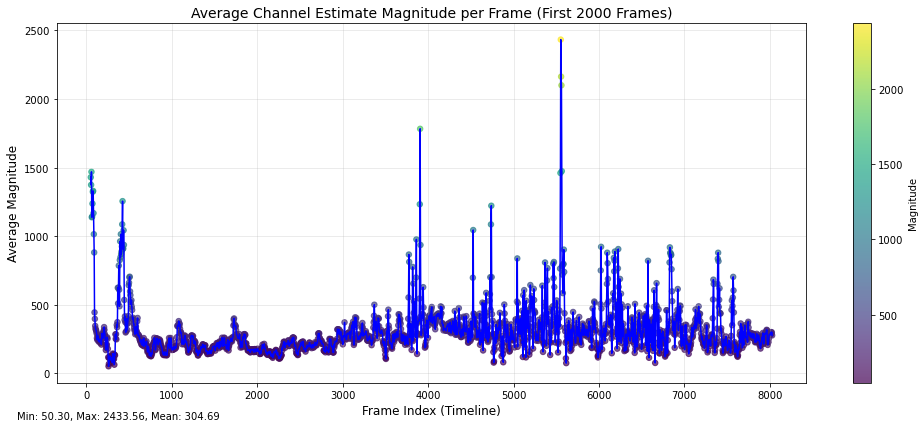

In [17]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt

# File path
file_path = os.path.join(os.getcwd(), '..', 'data', 'channel_estimates_x400_mission_6gnext2.txt')
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}")

# Data collection
timeline_data = {}  # Dictionary to store data for each frame: {timeline_index: [magnitudes]}
current_frame = None
cycle_count = 0
prev_frame = None
max_frame = 0  # Will be updated from data

print("Processing data...")

with open(file_path, 'r') as file:
    for line in file:
        # Match frame header
        frame_match = re.match(r'SRS Frame (\d+)', line)
        if frame_match:
            current_frame = int(frame_match.group(1))
            max_frame = max(max_frame, current_frame)
            
            # Detect cycle
            if prev_frame is not None and prev_frame > current_frame:
                cycle_count += 1
                
            prev_frame = current_frame
            
            # Calculate continuous timeline index
            timeline_index = current_frame + (cycle_count * (max_frame + 1))
            
            # Initialize list for this frame if not exists
            if timeline_index not in timeline_data:
                timeline_data[timeline_index] = []
            continue
        
        # Match subcarrier data
        sc_match = re.match(r'Sc (\d+): Re = (-?\d+), Im = (-?\d+)', line)
        if sc_match and current_frame is not None:
            re_val = int(sc_match.group(2))
            im_val = int(sc_match.group(3))
            
            # Calculate magnitude and append to the current frame's data
            magnitude = np.sqrt(re_val**2 + im_val**2)
            timeline_data[timeline_index].append(magnitude)

# Calculate average magnitude for each frame
timeline_indices = sorted(timeline_data.keys())
avg_magnitudes = [np.mean(timeline_data[idx]) for idx in timeline_indices]

# Limit to first 1000 frames
max_frames = 2000
if len(timeline_indices) > max_frames:
    timeline_indices = timeline_indices[:max_frames]
    avg_magnitudes = avg_magnitudes[:max_frames]

# Create plot
plt.figure(figsize=(14, 6))
plt.plot(timeline_indices, avg_magnitudes, 'b-', linewidth=1.5)
plt.scatter(timeline_indices, avg_magnitudes, c=avg_magnitudes, cmap='viridis', 
           s=30, alpha=0.7)

plt.xlabel('Frame Index (Timeline)', fontsize=12)
plt.ylabel('Average Magnitude', fontsize=12)
plt.title(f'Average Channel Estimate Magnitude per Frame (First {len(timeline_indices)} Frames)', 
         fontsize=14)
plt.grid(True, alpha=0.3)
plt.colorbar(label='Magnitude')

# Add some statistics as text
plt.figtext(0.02, 0.02, 
           f"Min: {min(avg_magnitudes):.2f}, Max: {max(avg_magnitudes):.2f}, Mean: {np.mean(avg_magnitudes):.2f}",
           fontsize=10)

plt.tight_layout()
plt.show()

# Optional: Save the results to a file
#np.savez('channel_avg_magnitudes.npz', 
 #       timeline=np.array(timeline_indices), 
  #      magnitudes=np.array(avg_magnitudes))

Analyzing frame sequence pattern...
Total frame entries: 19680
Number of unique frames: 256
Frame range: 0 to 1020
Number of cycle resets detected: 76
Most common frame interval: 4
Average frames per cycle: 255.82
Detected cycle reset after frames: [1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020
 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020
 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020
 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020
 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020 1020
 1020 1020 1020 1020 1020 1020]
Reset to frames: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]

Processing full dataset for visualization...
Cycle transition detected: 1020 → 0 (Cycle 1)
Cycle transition detected: 1020 → 0 (Cycle 2)
Cycle transition detected: 1020 → 0 (Cycle 3)
Cycle t

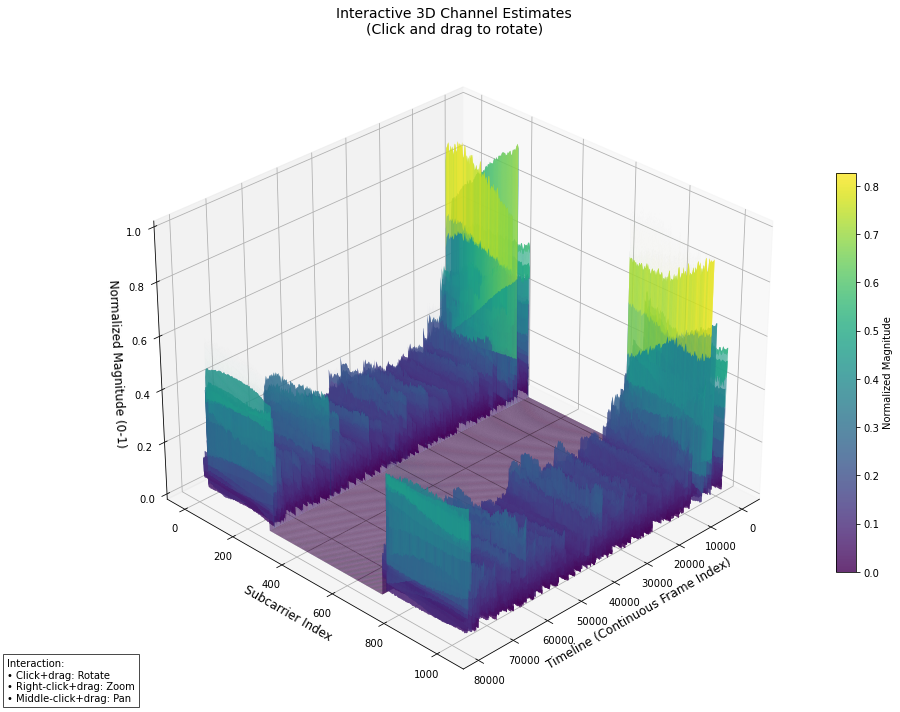

Interactive plot is now active. Close the figure window to continue.


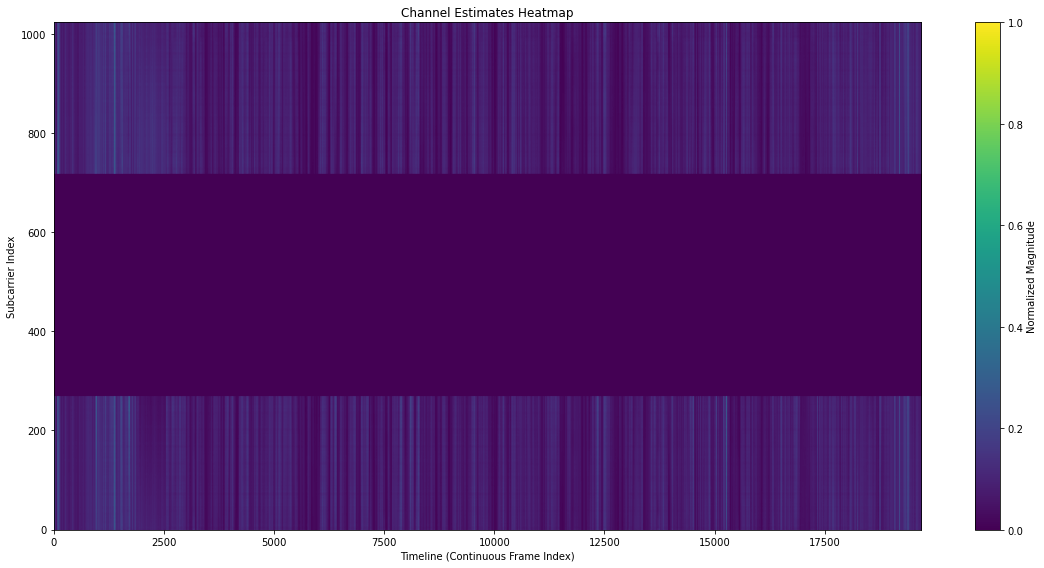

In [16]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


# Enable interactive mode for matplotlib
plt.ion()  # Turn on interactive mode

# File path
file_path = os.path.join(os.getcwd(), '..', 'data', 'channel_estimates_x400_mission_6gnext2.txt')
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}")

# Analysis of frame pattern
print("Analyzing frame sequence pattern...")
frame_numbers = []
frame_pattern = re.compile(r'SRS Frame (\d+)')

with open(file_path, 'r') as file:
    for line in file:
        match = frame_pattern.search(line)
        if match:
            frame_numbers.append(int(match.group(1)))

frame_numbers = np.array(frame_numbers)
frame_diffs = np.diff(frame_numbers)
cycle_resets = np.where(frame_diffs < -100)[0]
frame_interval = np.bincount(np.abs(frame_diffs))[1:].argmax() + 1

# Print analysis results
print(f"Total frame entries: {len(frame_numbers)}")
print(f"Number of unique frames: {len(np.unique(frame_numbers))}")
print(f"Frame range: {min(frame_numbers)} to {max(frame_numbers)}")
print(f"Number of cycle resets detected: {len(cycle_resets)}")
print(f"Most common frame interval: {frame_interval}")

if len(cycle_resets) > 0:
    print(f"Average frames per cycle: {np.mean(np.diff(np.append([0], cycle_resets))):.2f}")
    print(f"Detected cycle reset after frames: {frame_numbers[cycle_resets]}")
    print(f"Reset to frames: {frame_numbers[cycle_resets+1]}")

#Process the full dataset with continuous timeline
print("\nProcessing full dataset for visualization...")
frames = []
subcarriers = []
magnitudes = []
timeline_indices = []
current_frame = None
cycle_count = 0
prev_frame = None

with open(file_path, 'r') as file:
    for line in file:
        # Match frame header
        frame_match = re.match(r'SRS Frame (\d+)', line)
        if frame_match:
            current_frame = int(frame_match.group(1))
            
            # Detect cycle boundaries
            if prev_frame is not None and prev_frame > current_frame:
                cycle_count += 1
                print(f"Cycle transition detected: {prev_frame} → {current_frame} (Cycle {cycle_count})")
                
            prev_frame = current_frame
            
            # Calculate continuous timeline index
            timeline_index = current_frame + (cycle_count * (max(frame_numbers) + 1))
            continue
        
        # Match subcarrier data
        sc_match = re.match(r'Sc (\d+): Re = (-?\d+), Im = (-?\d+)', line)
        if sc_match and current_frame is not None:
            sc_num = int(sc_match.group(1))
            re_val = int(sc_match.group(2))
            im_val = int(sc_match.group(3))
            
            # Calculate magnitude
            magnitude = np.sqrt(re_val**2 + im_val**2)
            
            # Store data with timeline index
            frames.append(current_frame)
            subcarriers.append(sc_num)
            magnitudes.append(magnitude)
            timeline_indices.append(timeline_index)

# Convert to numpy arrays
frames = np.array(frames)
subcarriers = np.array(subcarriers)
magnitudes = np.array(magnitudes)
timeline_indices = np.array(timeline_indices)

# Normalize magnitudes to 0-1 range
min_mag = np.min(magnitudes)
max_mag = np.max(magnitudes)
norm_magnitudes = (magnitudes - min_mag) / (max_mag - min_mag)

print(f"\nVisualization statistics:")
print(f"Total data points: {len(magnitudes)}")
print(f"Continuous timeline range: {min(timeline_indices)} to {max(timeline_indices)}")
print(f"Number of frames on timeline: {len(np.unique(timeline_indices))}")
print(f"Number of subcarriers: {len(np.unique(subcarriers))}")
print(f"Magnitude range: {min_mag:.2f} to {max_mag:.2f}")

# After processing all your data, create interactive 3D visualization
print("\nCreating interactive 3D visualization...")

# Create a figure with a 3D axis, optimized for interaction
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Create a rectangular grid for the mesh (unchanged)
unique_timelines = np.sort(np.unique(timeline_indices))
unique_subcarriers = np.sort(np.unique(subcarriers))
X, Y = np.meshgrid(unique_timelines, unique_subcarriers)
Z = np.full(X.shape, np.nan)

# Fill Z values (unchanged)
timeline_map = {t: i for i, t in enumerate(unique_timelines)}
subcarrier_map = {s: i for i, s in enumerate(unique_subcarriers)}
for t, sc, mag in zip(timeline_indices, subcarriers, norm_magnitudes):
    Z[subcarrier_map[sc], timeline_map[t]] = mag

# Handle NaN values (unchanged)
mask = np.isnan(Z)
Z[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), Z[~mask]) if np.any(~mask) else 0

# Create the interactive surface plot with reduced complexity for smoother interaction
# Reduced stride makes rendering faster while interacting
surface = ax.plot_surface(X, Y, Z, 
                         cmap='viridis',
                         edgecolor='none',
                         alpha=0.8,
                         rstride=2,  # Reduce points for faster rendering
                         cstride=2,  # Reduce points for faster rendering
                         antialiased=True,
                         shade=True)

# Set labels and title
ax.set_xlabel('Timeline (Continuous Frame Index)', fontsize=12)
ax.set_ylabel('Subcarrier Index', fontsize=12)
ax.set_zlabel('Normalized Magnitude (0-1)', fontsize=12)
ax.set_title('Interactive 3D Channel Estimates\n(Click and drag to rotate)', fontsize=14)

# Add colorbar
cbar = fig.colorbar(surface, ax=ax, shrink=0.6)
cbar.set_label('Normalized Magnitude')

# Set initial view
ax.view_init(elev=30, azim=45)

# Add annotation with interaction instructions
fig.text(0.02, 0.02, "Interaction:\n• Click+drag: Rotate\n• Right-click+drag: Zoom\n• Middle-click+drag: Pan", 
         fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

# Make the layout tight
plt.tight_layout()

# Show the figure in interactive mode
plt.draw()
plt.pause(0.1)  # Small pause to ensure the figure shows up

# Keep the program running to allow interaction
print("Interactive plot is now active. Close the figure window to continue.")
# This will keep the figure active while allowing the program to continue
plt.show(block=True)

# Rest of code (heatmap) continues after the user closes the 3D plot...

# Create 2D heatmap for better pattern visualization
plt.figure(figsize=(16, 8))
heatmap_data = np.full((len(np.unique(subcarriers)), len(np.unique(timeline_indices))), np.nan)

# Create mapping from actual indices to array positions
timeline_map = {idx: pos for pos, idx in enumerate(sorted(np.unique(timeline_indices)))}
subcarrier_map = {idx: pos for pos, idx in enumerate(sorted(np.unique(subcarriers)))}

# Fill in the heatmap
for t, sc, m in zip(timeline_indices, subcarriers, norm_magnitudes):
    heatmap_data[subcarrier_map[sc], timeline_map[t]] = m

# Plot heatmap
plt.imshow(heatmap_data, aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='Normalized Magnitude')
plt.xlabel('Timeline (Continuous Frame Index)')
plt.ylabel('Subcarrier Index')
plt.title('Channel Estimates Heatmap')
plt.tight_layout()
plt.show()

Processing data...
Total available frames: 19680
Selected 251 frames from range 2000 to 3000 with step 1


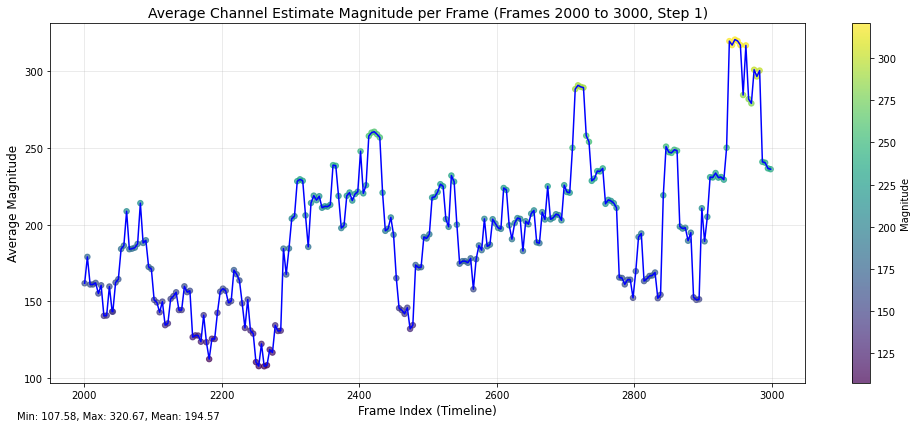

In [1]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt

# User-configurable parameters for frame selection
start_frame = 2000       # First frame to include in visualization
end_frame = 3000         # Last frame to include (set to None for all available frames)
frame_step = 1           # Step size for frame selection (1 = every frame, 2 = every other frame, etc.)

# File path
file_path = os.path.join(os.getcwd(), '..', 'data', 'channel_estimates_x400_mission_6gnext2.txt')
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}")

# Data collection
timeline_data = {}  # Dictionary to store data for each frame: {timeline_index: [magnitudes]}
current_frame = None
cycle_count = 0
prev_frame = None
max_frame = 0  # Will be updated from data

print("Processing data...")

with open(file_path, 'r') as file:
    for line in file:
        # Match frame header
        frame_match = re.match(r'SRS Frame (\d+)', line)
        if frame_match:
            current_frame = int(frame_match.group(1))
            max_frame = max(max_frame, current_frame)
            
            # Detect cycle
            if prev_frame is not None and prev_frame > current_frame:
                cycle_count += 1
                
            prev_frame = current_frame
            
            # Calculate continuous timeline index
            timeline_index = current_frame + (cycle_count * (max_frame + 1))
            
            # Initialize list for this frame if not exists
            if timeline_index not in timeline_data:
                timeline_data[timeline_index] = []
            continue
        
        # Match subcarrier data
        sc_match = re.match(r'Sc (\d+): Re = (-?\d+), Im = (-?\d+)', line)
        if sc_match and current_frame is not None:
            re_val = int(sc_match.group(2))
            im_val = int(sc_match.group(3))
            
            # Calculate magnitude and append to the current frame's data
            magnitude = np.sqrt(re_val**2 + im_val**2)
            timeline_data[timeline_index].append(magnitude)

# Calculate average magnitude for each frame
timeline_indices = sorted(timeline_data.keys())
avg_magnitudes = [np.mean(timeline_data[idx]) for idx in timeline_indices]

# Select the specified range of frames
total_frames = len(timeline_indices)
print(f"Total available frames: {total_frames}")

# Handle None value for end_frame (use all available frames)
if end_frame is None:
    end_frame = timeline_indices[-1]

# Filter frames based on the selected range
selected_indices = []
selected_magnitudes = []

for i, idx in enumerate(timeline_indices):
    if idx >= start_frame and idx <= end_frame and (idx - start_frame) % frame_step == 0:
        selected_indices.append(idx)
        selected_magnitudes.append(avg_magnitudes[i])

print(f"Selected {len(selected_indices)} frames from range {start_frame} to {end_frame} with step {frame_step}")

# Create plot
plt.figure(figsize=(14, 6))
plt.plot(selected_indices, selected_magnitudes, 'b-', linewidth=1.5)
plt.scatter(selected_indices, selected_magnitudes, c=selected_magnitudes, cmap='viridis', 
           s=30, alpha=0.7)

plt.xlabel('Frame Index (Timeline)', fontsize=12)
plt.ylabel('Average Magnitude', fontsize=12)
plt.title(f'Average Channel Estimate Magnitude per Frame (Frames {start_frame} to {end_frame}, Step {frame_step})', 
         fontsize=14)
plt.grid(True, alpha=0.3)
plt.colorbar(label='Magnitude')

# Add some statistics as text
plt.figtext(0.02, 0.02, 
           f"Min: {min(selected_magnitudes):.2f}, Max: {max(selected_magnitudes):.2f}, Mean: {np.mean(selected_magnitudes):.2f}",
           fontsize=10)

plt.tight_layout()
plt.show()

# Optional: Save the selected results to a file
np.savez('channel_avg_magnitudes_selected.npz', 
        timeline=np.array(selected_indices), 
        magnitudes=np.array(selected_magnitudes))